In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Definf our dataset
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,13,14,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

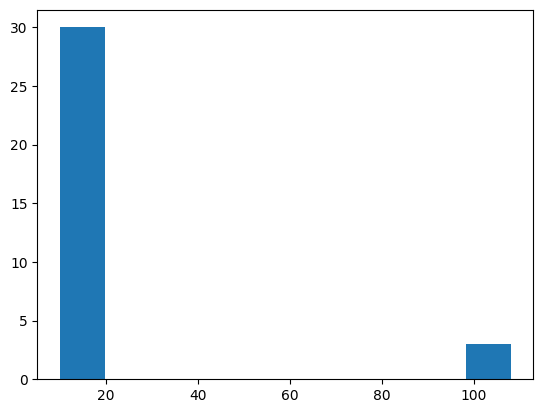

In [4]:
plt.hist(dataset)

In [8]:
# Z-score function to detect outliers
def detect_outliers(data):
    threshold = 3  # 3rd standard deviation
    mean = np.mean(data)
    std = np.std(data)
    outliers = []  # Define the outliers list inside the function

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers  # Return the list of outliers after the loop completes


In [9]:
# Detect outliers in the dataset
outliers = detect_outliers(dataset)
print("Outliers:", outliers)


Outliers: [102, 107, 108]


## IQR
1. sort the data
2. Calculate Q1(25%) and Q3(75%)
3. IQR (Q3-Q1)
4. Find the lower fence (Q1-1.5(IQR))
5. Find the lower fence (Q3+1.5(IQR))

In [10]:
## sort the data
sorted(dataset)

dataset

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 102,
 12,
 14,
 17,
 19,
 107,
 10,
 13,
 13,
 14,
 108,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 10,
 14,
 13,
 15,
 10]

In [18]:
## Calculate Q1(25%) and Q3(75%)
q1, q3 = np.percentile(dataset,[25,75])

print(q1, q3)

12.0 15.0


In [21]:
## IQR (Q3-Q1)
iqr = q3 - q1

print(iqr)

3.0


In [33]:
## Find the lower fence and hiher fence
lower = q1 - 1.5 * iqr
hiher = q3 + 1.5 * iqr

print("Lower_fence",lower)
print("Hiher_fence",hiher)


## Find outliers in for loop
outliers =  []
for i in dataset:
    if i < lower or i > hiher:
        outliers.append(i)

print()
print("Outliers",outliers)

Lower_fence 7.5
Hiher_fence 19.5

Outliers [102, 107, 108]


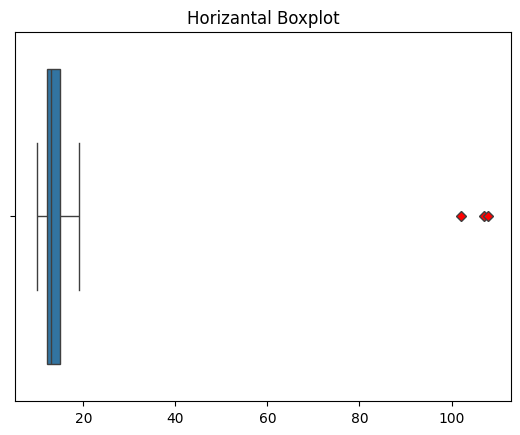

In [39]:
## create a Boxplot
sns.boxplot(x=dataset,orient="h", flierprops=dict(markerfacecolor='r', marker='D', markersize=5)) # Customize outliers
## Add title
plt.title("Horizantal Boxplot")

## Show the plot
plt.show()